## Approksimasiya

**Approksimasiya** riyaziyyat və hesablama sahəsində, mürəkkəb funksiyaları və ya verilənləri daha sadə modellərlə təxmin etmə prosesidir.  

Məsələn:  
- **Xətti Approksimasiya** — verilənlərə uyğun ən yaxşı xətti funksiyanı tapmaq.  
- **Polinomial Approksimasiya** — verilənlərə uyğun çoxhədli (polinom) bir funksiya tapmaq.  
- **En Kiçik Kvadratlar Metodu** — təxmin edilən və həqiqi dəyərlər arasındakı fərqi minimuma endirmək üçün istifadə edilən bir approksimasiya metodu.  

Siz konkret hansı kontekstdə bu termini görmüsünüz?

## Gradient Descent-də Momentum

### **Gradient Descent-də Momentum (Geniş İzah)**  
---  

Gradient Descent optimallaşdırma metodunda **momentum** istifadə etməyin əsas məqsədi **sürəti artırmaq və sarsıntıları (oscillations) azaltmaqdır**. Momentum, keçmiş iterasiyaların təsirini saxlayaraq, optimallaşdırmanın daha səmərəli və stabil olmasını təmin edir.  

---  

## **1. Əsas Gradient Descent Metodu**  
Ən sadə gradient descent metodu aşağıdakı şəkildə işləyir:  

$$
x_{n+1} = x_n - \eta \frac{\partial f}{\partial x}
$$  

Burada:  
- $x_n$ – cari iterasiyadakı parametr,  
- $\eta$ (learning rate) – öyrənmə sürəti,  
- $\frac{\partial f}{\partial x}$ – gradient.  

**Problem:** Əgər **gradientin istiqaməti tez-tez dəyişirsə**, metod yavaş işləyir və çoxlu titrəmələr (oscillations) ola bilər.  

---  

## **2. Momentum Nədir və Necə İşləyir?**  
Momentum anlayışı fizika qanunlarına əsaslanır. Əgər bir obyekt hərəkət edirsə, onun **keçmiş hərəkət istiqaməti indiki sürətə təsir edir**.    

Momentumlu gradient descent formulunu aşağıdakı kimi yazırıq:  

$$
v_{n+1} = \gamma v_n - \eta \frac{\partial f}{\partial x}
$$  

$$
x_{n+1} = x_n + v_{n+1}
$$  

Burada:  
- $ v_n $ – sürət (velocity),  
- $ \gamma $ – momentum əmsalı ($0 < \gamma < 1$),  
- $ \eta $ – öyrənmə sürəti,  
- $ \frac{\partial f}{\partial x} $ – gradient.  

**Fərq nədir?**  
- Əgər **$\gamma = 0$ olarsa**, metod sadə gradient descent olur.  
- **$\gamma$ keçmiş sürəti də saxlayır, bu da optimallaşdırmanı sürətləndirir.**  
- Bu metod **dərin çuxurlarda titrəmələri azaldır**.  

---  

## **3. Niyə Sonda $\gamma$ Təsirsiz Olur?**  
İndi isə əsas sualı cavablandıraq: **İterasiyalar çoxaldıqca niyə $\gamma$ təsirini itirir?**    

Bu ifadəni təkrarla açsaq:  

$$
v_n = \gamma v_{n-1} - \eta \frac{\partial f}{\partial x}
$$  

$$
v_{n-1} = \gamma v_{n-2} - \eta \frac{\partial f}{\partial x}
$$  

Bunu iterasiya ilə geri açdıqda:  

$$
v_n = \gamma^n v_0 - \eta \sum_{i=0}^{n-1} \gamma^i \frac{\partial f}{\partial x}
$$  

Burada:  
- $ \gamma^n v_0 $ – başlanğıc sürətin təsiri (**bu hissə sıfıra yaxınlaşır, çünki $ 0 < \gamma < 1 $ olduğu üçün eksponensial olaraq azalır**).  
- **Son cəmdə əsas təsir ən son gradientlərdə olur**.  

---  

## **4. Nümunə İlə İzah**  
Tutaq ki:  
- **$\gamma = 0.9$**,  
- İlk gradientlər **$5, 4, 3, 2, 1$** olsun.  

Başlanğıcda sürət $v_0 = 0$ olduğu üçün hesablayaq:  

$$
v_1 = 0.9 \cdot 0 - 1 \cdot 5 = -5
$$  

$$
v_2 = 0.9 \cdot (-5) - 1 \cdot 4 = -4.5 - 4 = -8.5
$$  

$$
v_3 = 0.9 \cdot (-8.5) - 1 \cdot 3 = -7.65 - 3 = -10.65
$$  

$$
v_4 = 0.9 \cdot (-10.65) - 1 \cdot 2 = -9.585 - 2 = -11.585
$$  

$$
v_5 = 0.9 \cdot (-11.585) - 1 \cdot 1 = -10.4265 - 1 = -11.4265
$$  

Görürük ki:  
- **Keçmiş iterasiyaların təsiri azalır, çünki $\gamma^n$ sıfıra doğru gedir**.  
- Son iterasiyanın gradienti daha çox təsir edir.  
- **Sonda yalnız son gradient dominant qalır** və momentum təsirsiz olur.  

---  

## **5. Nəticə**  
- **Momentum başlanğıcda optimallaşdırmanı sürətləndirir.**  
- **Keçmiş iterasiyaların təsiri eksponensial olaraq azalır.**  
- **İterasiyalar çox olduqda, optimallaşdırma əsasən son gradientdən asılı olur.**  
- **Sonda $\gamma$ təsirsiz olur və adi gradient descent-ə yaxınlaşır.**  

**Yəni, momentum yalnız başlanğıcda optimallaşdırmanı sürətləndirir, amma limitdə təsiri az qalır.**

## Gradient descent method for two parameters

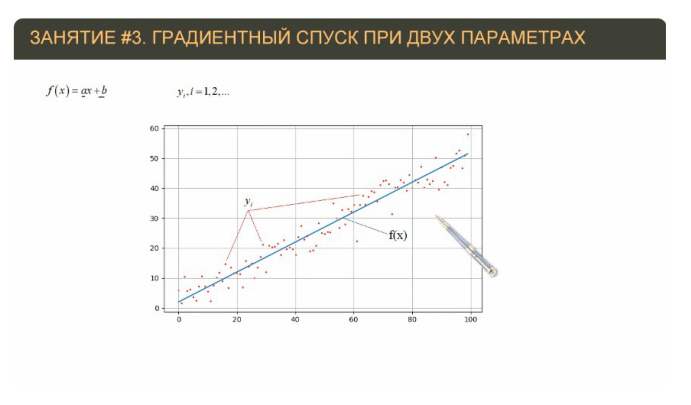

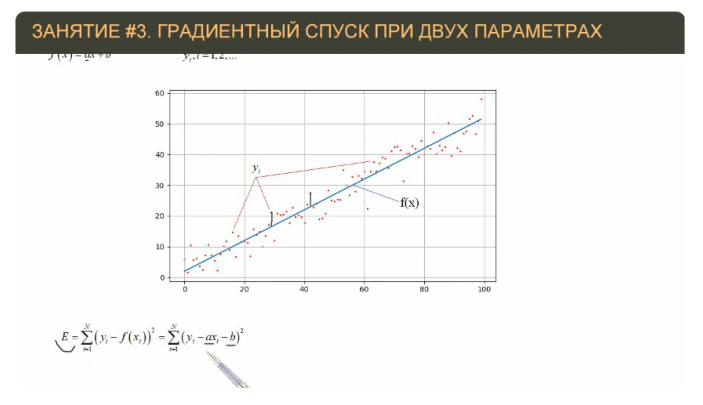

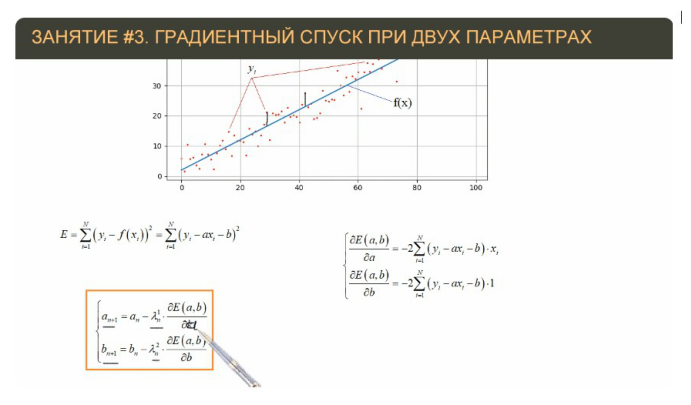

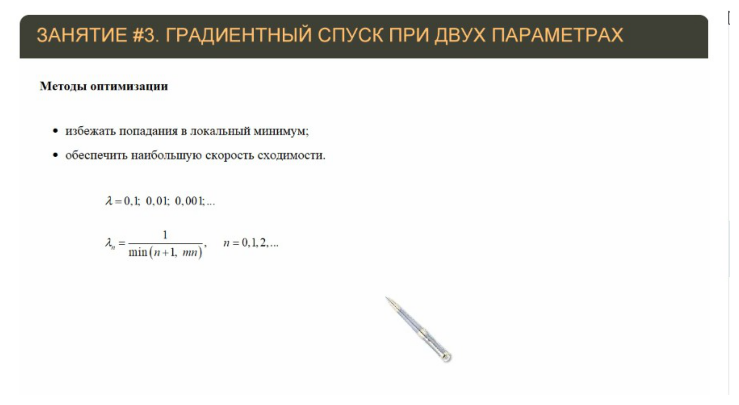

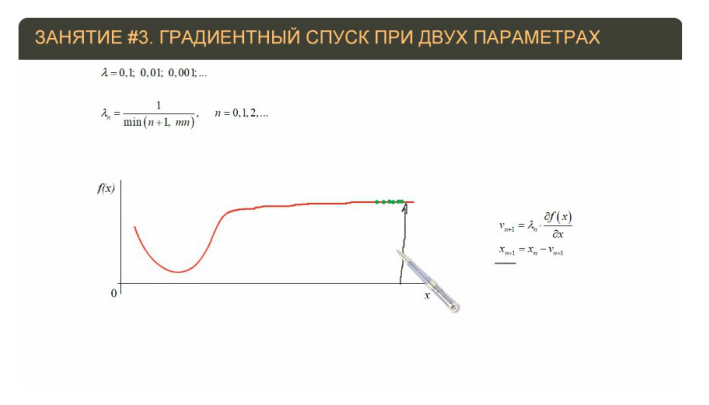

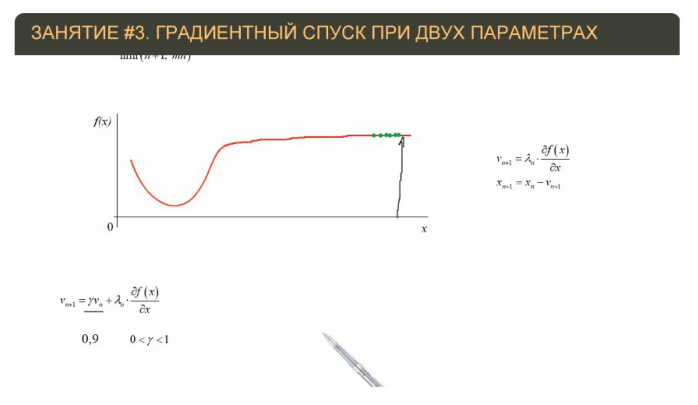

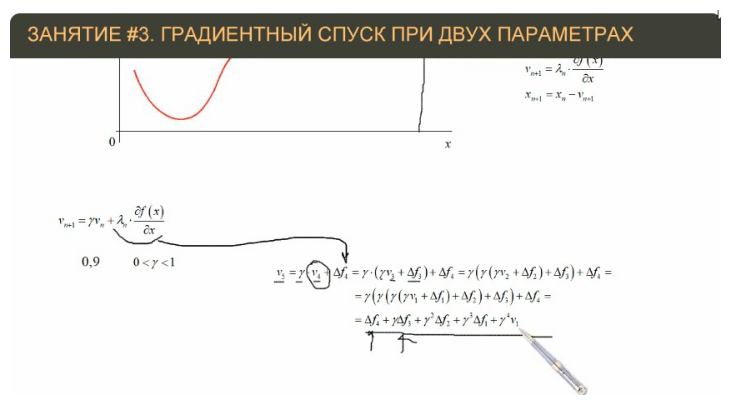

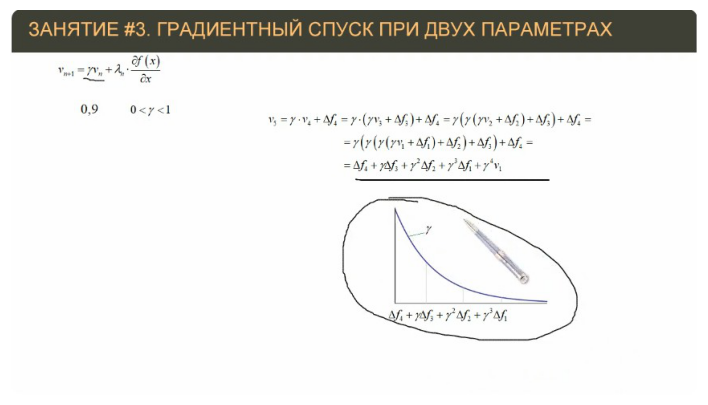

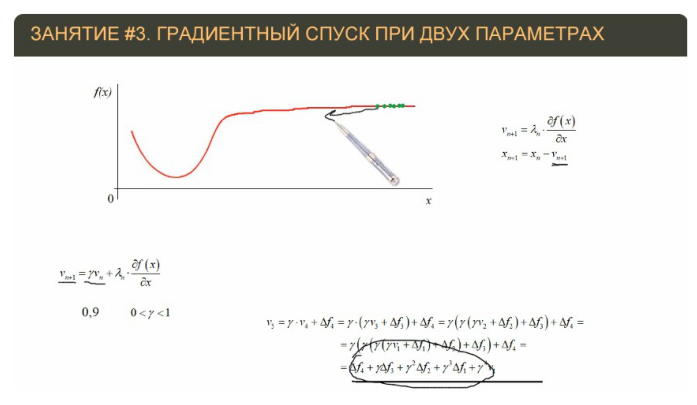

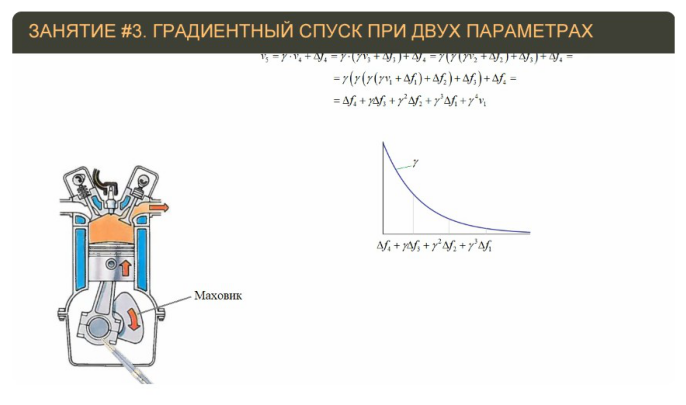

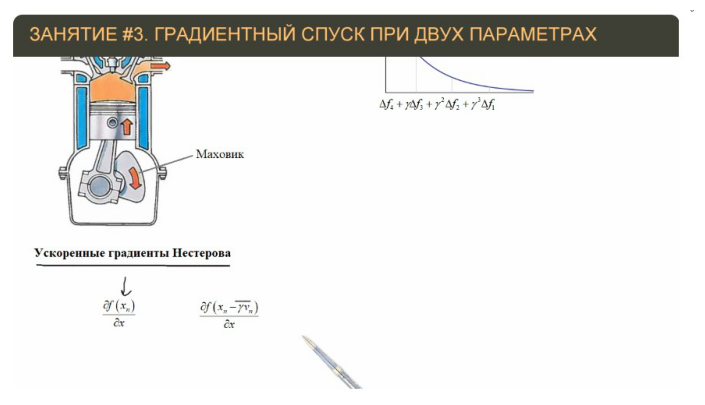

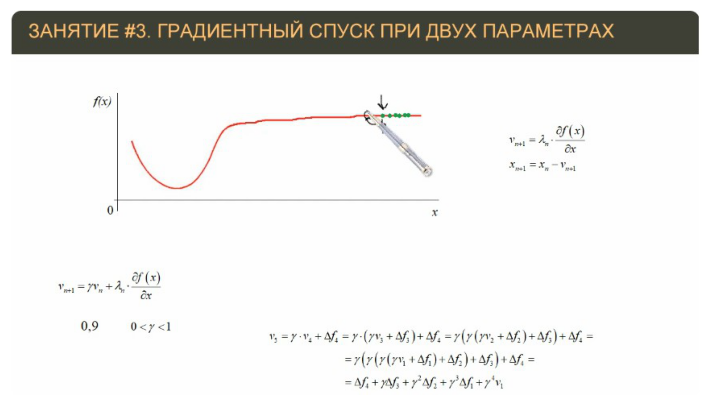

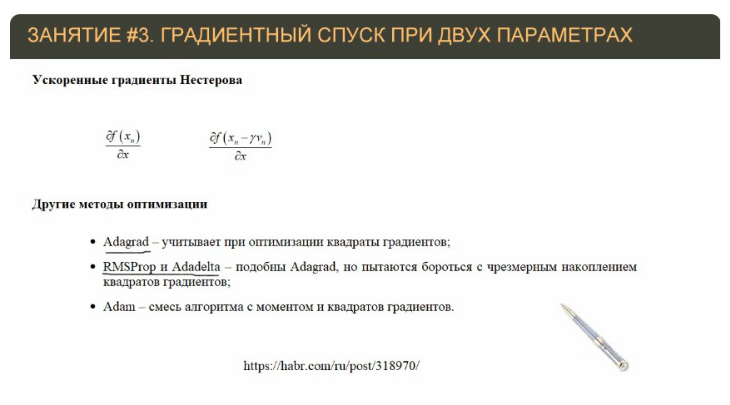

In [36]:
%matplotlib inline

from PIL import Image

# Fayl yolunun əsas hissəsi
base_path = r'C:\Users\dell\Desktop\Selfedu\Optimization Algorithms\Pictures\Gradient_2_parameter_'

# Şəkilləri saxlayacağımız siyahı
image_list = []

# 1-dən 5-ə qədər olan şəkilləri dövr ilə açırıq
for i in range(1, 14):  # 1-dən 5-ə qədər
    full_path = f'{base_path}{i}.jpg'  # Fayl yolunu dinamik olaraq yaradırıq
    img = Image.open(full_path)
    image_list.append(img)  # Şəkili siyahıya əlavə edirik

# Nəticə: images siyahısında bütün yüklənmiş şəkillər olacaq

import matplotlib.pyplot as plt

# Şəkilləri göstərin
for image in image_list:
    plt.figure(figsize=(25, 5))  # Şəkilin ölçüsü
    plt.imshow(image)
    plt.axis('off')  # Oxları gizlətmək üçün
    plt.show() 

## Python dilində izah

<IPython.core.display.Javascript object>


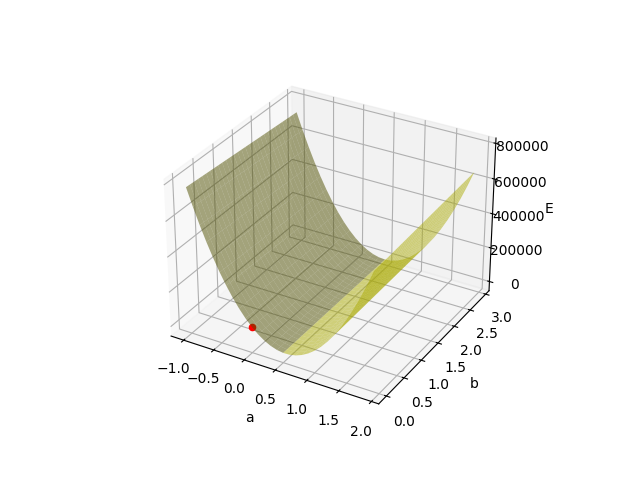

In [13]:
# Jupyter Notebook-da interaktiv qrafiklərin göstərilməsi üçün %matplotlib notebook komandasını istifadə edirik
%matplotlib notebook  


import time  # Kod icrası zamanı gecikmə (sleep) funksiyası üçün
import numpy as np  # Rəqəmsal hesablamalar və massivlər üçün
import matplotlib.pyplot as plt  # Qrafiklər çəkmək üçün
from mpl_toolkits.mplot3d import Axes3D  # 3D qrafiklər yaratmaq üçün

# İtki funksiyası (Loss function) - E(a, b)
# Bu funksiya verilmiş 'a' və 'b' parametrləri üçün xətti modelin kvadrat xətasını qaytarır
def E(y, a, b):
    ff = np.array([a * z + b for z in range(N)])  # a*x + b xətti modelini qururuq
    return np.dot((y-ff).T, (y-ff))  # Kvadrat fərqlərin cəmini qaytarır

# E funksiyasının a parametrinə görə törəməsi (Gradient)
def dEda(y, a, b):
    ff = np.array([a * z + b for z in range(N)])  # Xətti modelin dəyərləri
    return -2*np.dot((y - ff).T, range(N))  # a-ya görə gradienti qaytarır

# E funksiyasının b parametrinə görə törəməsi (Gradient)
def dEdb(y, a, b):
    ff = np.array([a * z + b for z in range(N)])  # Xətti modelin dəyərləri
    return -2*(y - ff).sum()  # b-yə görə gradienti qaytarır

# Parametrlər
N = 100       # Müşahidələrin (nümunələrin) sayı
Niter = 50    # Gradient descent iterasiyalarının sayı
sigma = 3     # Səs səviyyəsi (verilənlərə əlavə edilən təsadüfi dəyişiklik)
at = 0.5      # Əsl (orijinal) 'a' parametri (təcrübədə məlum deyil)
bt = 2        # Əsl (orijinal) 'b' parametri (təcrübədə məlum deyil)

# Modelin başlanğıc parametrləri (gradient descent-in başlanğıc nöqtəsi)
aa = 0  
bb = 0  
lmd1 = 0.000001  # a üçün learning rate (öyrənmə sürəti)
lmd2 = 0.0005    # b üçün learning rate (öyrənmə sürəti)

# Əsl xətti model: y = at*x + bt (səs olmadan ideal model)
f = np.array([at*z+bt for z in range(N)])

# Gerçək ölçülər: xətti modelə normal paylanmış səs (noise) əlavə edirik
y = np.array(f + np.random.normal(0, sigma, N))

# a və b üçün müxtəlif dəyərlər aralığı
a_plt = np.arange(-1, 2, 0.1)  # a üçün dəyərlər
b_plt = np.arange(0, 3, 0.1)   # b üçün dəyərlər

# Hər bir (a, b) cütü üçün itki funksiyasının dəyərlərini hesablayırıq
E_plt = np.array([[E(y, a, b) for a in a_plt] for b in b_plt])

# İnteraktiv rejimi aktivləşdiririk (qrafikləri dinamik göstərmək üçün)
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D qrafik üçün meshgrid (a və b dəyərləri üçün)
a, b = np.meshgrid(a_plt, b_plt)

# E funksiyasının 3D səth qrafikini çəkirik
ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)  

# OX adlarını təyin edirik
ax.set_xlabel('a')  
ax.set_ylabel('b')  
ax.set_zlabel('E')  # Itki funksiyası (Loss)

# Gradient descent-in başlanğıc nöqtəsini 3D qrafikdə qırmızı nöqtə ilə işarələyirik
point = ax.scatter(aa, bb, E(y, aa, bb), c='red')


# İnteraktiv rejimi söndürürük və final qrafiki göstəririk
plt.ioff()
plt.show()

## Python dilində izah

<IPython.core.display.Javascript object>


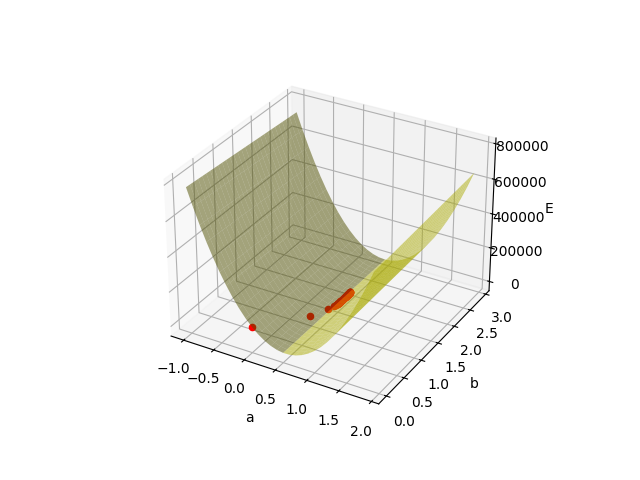

0.3520057868261876 0.9626725614118585
0.4633189150856405 1.2780778817982397
0.49841019934528547 1.3882408130607398
0.5093664242121229 1.4331541381061448
0.5126830542909586 1.4571588117567722
0.5135840071278818 1.4743033014995675
0.5137235737883438 1.4890424872987962
0.513625569083468 1.502792877807237
0.5134557952022506 1.51600860997686
0.5132666760803494 1.5288389085829317
0.5130747315296006 1.5413363028546028
0.512885112762039 1.5535225705985367
0.5126993725884701 1.5654096254272432
0.5125179261440798 1.5770061346728113
0.5123408301381894 1.5883196182229795
0.5121680295922206 1.5993571161206765
0.5119994359356023 1.6101254028288647
0.5118349516948741 1.6206310578578385
0.5116744782702454 1.6308804908358274
0.5115179183570883 1.6408799520861448
0.5113651766725232 1.6506355385500275
0.5112161601462196 1.6601531981727249
0.5110707779424749 1.669438733741689
0.5109289414297966 1.6784978064915141
0.5107905641347709 1.6873359395767342
0.5106555616918449 1.6959585214459159
0.510523851792683

<IPython.core.display.Javascript object>


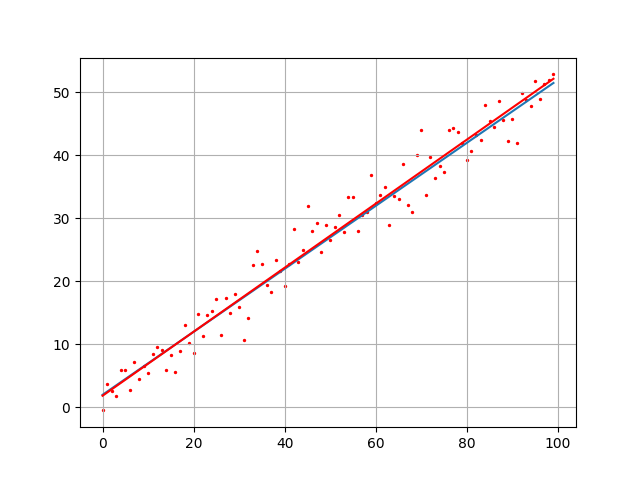

In [1]:
# Jupyter Notebook-da interaktiv qrafiklərin göstərilməsi üçün %matplotlib notebook komandasını istifadə edirik
%matplotlib notebook  


import time  # Kod icrası zamanı gecikmə (sleep) funksiyası üçün
import numpy as np  # Rəqəmsal hesablamalar və massivlər üçün
import matplotlib.pyplot as plt  # Qrafiklər çəkmək üçün
from mpl_toolkits.mplot3d import Axes3D  # 3D qrafiklər yaratmaq üçün

# İtki funksiyası (Loss function) - E(a, b)
# Bu funksiya verilmiş 'a' və 'b' parametrləri üçün xətti modelin kvadrat xətasını qaytarır
def E(y, a, b):
    ff = np.array([a * z + b for z in range(N)])  # a*x + b xətti modelini qururuq
    return np.dot((y-ff).T, (y-ff))  # Kvadrat fərqlərin cəmini qaytarır

# E funksiyasının a parametrinə görə törəməsi (Gradient)
def dEda(y, a, b):
    ff = np.array([a * z + b for z in range(N)])  # Xətti modelin dəyərləri
    return -2*np.dot((y - ff).T, range(N))  # a-ya görə gradienti qaytarır

# E funksiyasının b parametrinə görə törəməsi (Gradient)
def dEdb(y, a, b):
    ff = np.array([a * z + b for z in range(N)])  # Xətti modelin dəyərləri
    return -2*(y - ff).sum()  # b-yə görə gradienti qaytarır

# Parametrlər
N = 100       # Müşahidələrin (nümunələrin) sayı
Niter = 50    # Gradient descent iterasiyalarının sayı
sigma = 3     # Səs səviyyəsi (verilənlərə əlavə edilən təsadüfi dəyişiklik)
at = 0.5      # Əsl (orijinal) 'a' parametri (təcrübədə məlum deyil)
bt = 2        # Əsl (orijinal) 'b' parametri (təcrübədə məlum deyil)

# Modelin başlanğıc parametrləri (gradient descent-in başlanğıc nöqtəsi)
aa = 0  
bb = 0  
lmd1 = 0.000001  # a üçün learning rate (öyrənmə sürəti)
lmd2 = 0.0005    # b üçün learning rate (öyrənmə sürəti)

# Əsl xətti model: y = at*x + bt (səs olmadan ideal model)
f = np.array([at*z+bt for z in range(N)])

# Gerçək ölçülər: xətti modelə normal paylanmış səs (noise) əlavə edirik
y = np.array(f + np.random.normal(0, sigma, N))

# a və b üçün müxtəlif dəyərlər aralığı
a_plt = np.arange(-1, 2, 0.1)  # a üçün dəyərlər
b_plt = np.arange(0, 3, 0.1)   # b üçün dəyərlər

# Hər bir (a, b) cütü üçün itki funksiyasının dəyərlərini hesablayırıq
E_plt = np.array([[E(y, a, b) for a in a_plt] for b in b_plt])

# İnteraktiv rejimi aktivləşdiririk (qrafikləri dinamik göstərmək üçün)
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D qrafik üçün meshgrid (a və b dəyərləri üçün)
a, b = np.meshgrid(a_plt, b_plt)

# E funksiyasının 3D səth qrafikini çəkirik
ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)  

# OX adlarını təyin edirik
ax.set_xlabel('a')  
ax.set_ylabel('b')  
ax.set_zlabel('E')  # Itki funksiyası (Loss)

# Gradient descent-in başlanğıc nöqtəsini 3D qrafikdə qırmızı nöqtə ilə işarələyirik
point = ax.scatter(aa, bb, E(y, aa, bb), c='red')

# Gradient Descent iterasiyalarını icra edirik
for n in range(Niter):
    aa = aa - lmd1 * dEda(y, aa, bb)  # a-nın yeni dəyərini hesablamaq üçün gradientin əksi istiqamətində hərəkət
    bb = bb - lmd2 * dEdb(y, aa, bb)  # b-nin yeni dəyərini hesablamaq üçün gradientin əksi istiqamətində hərəkət

    # Yenilənmiş nöqtəni 3D qrafikdə qırmızı nöqtə kimi əlavə edirik
    ax.scatter(aa, bb, E(y, aa, bb), c='red')

    # Qrafiki yeniləyirik və bir az gözləyirik (animasiyalı göstərmək üçün)
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.01)

    # Hər iterasiyadan sonra yenilənmiş (a, b) dəyərlərini çap edirik
    print(aa, bb)

# İnteraktiv rejimi söndürürük və final qrafiki göstəririk
plt.ioff()
plt.show()

# Final olaraq əldə edilən xətti modeli və əsl xətti modeli qrafikdə göstəririk
ff = np.array([aa*z+bb for z in range(N)])  # Tapılmış a və b dəyərləri ilə yeni model

# Müşahidə olunan məlumat nöqtələrini göstəririk (qırmızı nöqtələr)
plt.scatter(range(N), y, s=2, c='red')

# Əsl xətti modeli göstəririk (mavi xətt)
plt.plot(f)

# Gradient descent ilə tapılan xətti model (qırmızı xətt)
plt.plot(ff, c='red')

# Şəbəkə xətləri əlavə edirik və qrafiki göstəririk
plt.grid(True)
plt.show()